Copyright (c) 2019 OERCompBiomed (UiB)

# A short "get-started" to object recognition in computer vision

###  "[Hello World](https://en.wikipedia.org/wiki/%22Hello,_World!%22_program) 1" (MNIST) using TF 2 / [Keras](https://www.tensorflow.org/beta/guide/keras)


**Object recognition** is a general term to describe a collection of related computer vision tasks that involve identifying objects in digital images. In this notebook we will consider the task:

- **Image Classification**: Predict the type or class of an object in an image.
  - *Input*: An image with a single object, such as a photograph or a medical image.
  - *Output*: A class label (e.g. one or more integers that are mapped to class labels).





Adapted from:<br>
https://github.com/tensorflow/docs/blob/master/site/en/r2/tutorials/quickstart/beginner.ipynb and <br>
https://github.com/tensorflow/docs/blob/master/site/en/r2//tutorials/keras/basic_classification.ipynb

In [1]:
# Copyright 2019 The TensorFlow Authors.
#
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

### See our `environment.yml` file for Tensorflow 2.0.0-beta installation in conda virtual environment (cbm101) 
Within this environment we could also do a <br>
`!pip install -q tensorflow==2.0.0-beta`

In [3]:
# Check wether your are using the conda virtual environment
#  coomands are OS specific
import os
if os.name == 'nt':
    !where pip
    !where python
else:
    !which pip
    !which python

C:\Users\arvid\Anaconda3\envs\cbm101\Scripts\pip.exe
C:\Python27\Scripts\pip.exe
C:\Users\arvid\Anaconda3\envs\cbm101\python.exe
C:\Python27\python.exe


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pydot
import graphviz
import seaborn as sns

In [5]:
print('tf version:', tf.__version__)
print('matplotlib version:', matplotlib.__version__)
print('pydot version:', pydot.__version__)
print('graphviz version:', graphviz.__version__)
print('seaborn version:', sns.__version__)

tf version: 2.0.0-beta1
matplotlib version: 3.1.0
pydot version: 1.4.1
graphviz version: 0.11.1
seaborn version: 0.9.0


## the [MNIST](http://yann.lecun.com/exdb/mnist) dataset.

"... The MNIST database of handwritten digits, available from [this](http://yann.lecun.com/exdb/mnist) page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size (28 x 28, unsigned byte) image.

It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting."  See [LeCun et al. 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf).


Here are [sample images](https://en.wikipedia.org/wiki/MNIST_database) from MNIST test dataset  (each class takes one row):

![mnist](assets/MnistExamples.png)


Convert the samples from integers to floating-point numbers:

In [6]:
mnist = tf.keras.datasets.mnist

In [7]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [8]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Explore the MNIST data

**Training set**

In [9]:
print(x_train.shape)
print(y_train)
u, cnt = np.unique(y_train, return_counts=True)
print('unique labels:', u, 'their counts:', cnt)
print(len(y_train))

(60000, 28, 28)
[5 0 4 ... 5 6 8]
unique labels: [0 1 2 3 4 5 6 7 8 9] their counts: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
60000


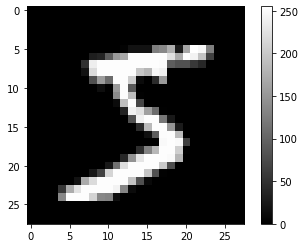

In [10]:
plt.figure()
plt.imshow(x_train[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

**Test set**

In [11]:
print(x_test.shape)
print(y_test)
u, cnt = np.unique(y_test, return_counts=True)
print('unique labels:', u, 'their counts:', cnt)
print(len(y_test))

(10000, 28, 28)
[7 2 1 ... 4 5 6]
unique labels: [0 1 2 3 4 5 6 7 8 9] their counts: [ 980 1135 1032 1010  982  892  958 1028  974 1009]
10000


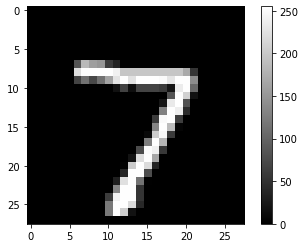

In [12]:
plt.figure()
plt.imshow(x_test[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

### Normalize pixel values to be between 0 and 1

In [13]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## Build a sequential model using Flattening of input images

In Keras, you assemble layers to build models. A model is (usually) a graph of layers. The most common type of model is a stack of layers: the [`tf.keras.Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model.

In [14]:
model = tf.keras.Sequential()
# Adds a flatten layer with input shape 28x28 units to the model:
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# Adds a densely-connected layer with 512 units and the _relu_ activation function to the model:
model.add(tf.keras.layers.Dense(512, activation='relu'))
# Add a _dropout_ layer
model.add(tf.keras.layers.Dropout(0.2))
# Add a softmax layer with 10 output units and the _softmax_ activatikon function:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

**or, more terse:**

In [15]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


We can also plot the model as a graph:

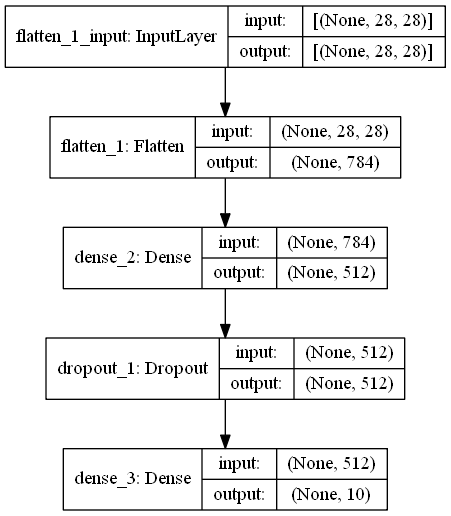

In [17]:
tf.keras.utils.plot_model(model1, '/tmp/my_first_model_with_shape_info.png', show_shapes=True)

### Compile the keras model

In [18]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [19]:
model1.fit(x_train, y_train, epochs=5)

W0819 09:40:06.531510  9776 deprecation.py:323] From C:\Users\arvid\Anaconda3\envs\cbm101\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2190 - accuracy: 0.9352
Epoch 2/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0970 - accuracy: 0.9701
Epoch 3/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0691 - accuracy: 0.9785
Epoch 4/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0518 - accuracy: 0.9836
Epoch 5/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0436 - accuracy: 0.9856


### Test the model

In [20]:
test_loss, test_acc = model1.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.0607 - accuracy: 0.9806


In [21]:
print('Loss:', test_loss.round(3))

Loss: 0.061


In [22]:
print('Accuracy:', test_acc.round(3))

Accuracy: 0.981


The image classifier is now trained to ~97% accuracy on this dataset.

### Make predictions with model1

With the model1 trained, we can use it to make predictions about some images.

In [23]:
predictions1 = model1.predict(x_test)

In [24]:
# Predictions of first image in the test dataset
predictions1[0]

array([1.7396430e-09, 2.7307938e-09, 1.8335406e-06, 1.6603409e-06,
       1.9766263e-14, 3.5253717e-10, 5.2978921e-15, 9.9999642e-01,
       1.0024387e-08, 1.7299183e-07], dtype=float32)

In [25]:
# Sum of probabilities across the 10 classes
predictions1[0].sum()

1.0000001

In [26]:
# Digit with max probability
np.argmax(predictions1[0])

7

In [27]:
# True class
y_test[0]

7

In [28]:
# Use list comprehensen to generate class labels (digit names '0','1', ...,'9')
class_names = [str(i) for i in list(range(0,10))]

### Confusion Matrix and Classification report (using flattening)

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred1 = np.argmax(predictions1, axis=1)
print(class_names, '\n')
print(confusion_matrix(y_test, pred1))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] 

[[ 973    0    1    0    0    0    3    1    2    0]
 [   0 1123    2    2    0    0    2    0    6    0]
 [   3    0 1015    3    1    0    2    3    5    0]
 [   0    0    8  994    0    1    0    2    3    2]
 [   1    0    4    0  968    0    0    2    1    6]
 [   3    0    0   15    1  863    2    1    5    2]
 [   5    2    1    1    5    3  936    0    5    0]
 [   1    3   10    3    1    0    0 1004    2    4]
 [   5    0    4    6    4    1    1    3  950    0]
 [   2    3    0    4   10    2    0    5    3  980]]


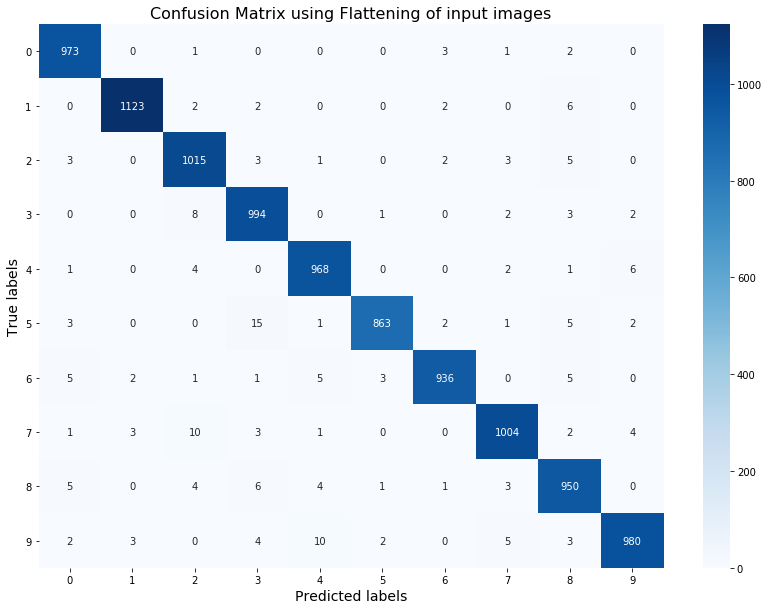

In [30]:
# Make a heatmap plot of the confusion matrix

fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap(confusion_matrix(y_test, pred1), 
            annot = True, 
            fmt = 'g',
            cmap = "Blues",
            ax = ax) # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)
ax.set_title('Confusion Matrix using Flattening of input images', fontsize = 16) 
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.yticks(rotation=0) 
plt.show()

In [31]:
print(classification_report(y_test, pred1, target_names = class_names))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Build a sequential model using Convolutional Neural Networks (CNNs)

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to color channels, MNIST has one (because the images are grayscale), whereas a color image has three (R,G,B). In this example, we will configure our CNN to process inputs of shape (28, 28, 1), which is the format of MNIST images. We do this by passing the argument input_shape to our first layer.


In [32]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Convolution2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model2.add(tf.keras.layers.Convolution2D(64, (3, 3), activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model2.add(tf.keras.layers.Convolution2D(64, (3, 3), activation='relu'))

In [33]:
# Display the architecture
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


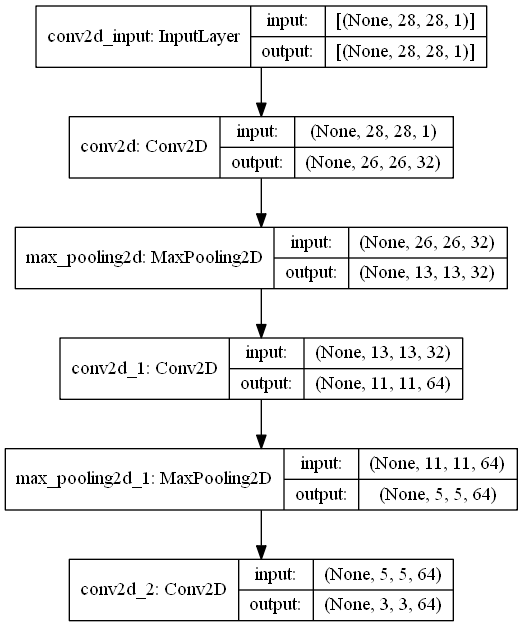

In [34]:
# or, more graphically
tf.keras.utils.plot_model(model2, '/tmp/my_second_model_with_shape_info.png', show_shapes=True)

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as we go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, we can afford (computationally) to add more output channels in each Conv2D layer.

**Add Dense layers on top**

To complete our model, we will feed the last output tensor from the convolutional base (of shape (3, 3, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, we will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. MNIST has 10 output classes, so we use a final Dense layer with 10 outputs and a [softmax](https://en.wikipedia.org/wiki/Softmax_function) activation.

In [35]:
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(64, activation='relu'))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [36]:
# The complete architecture of the tensorflow model
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

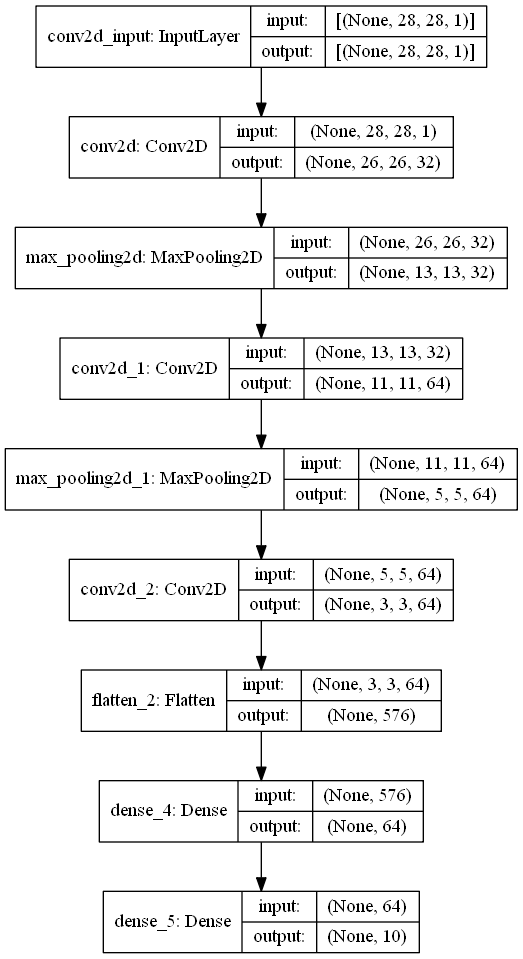

In [37]:
tf.keras.utils.plot_model(model2, '/tmp/my_second_full_model_with_shape_info.png', show_shapes=True)

### Compile the CNN model

In [38]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the CNN model

In [39]:
train_images = x_train.reshape((60000, 28, 28, 1))
test_images = x_test.reshape((10000, 28, 28, 1))

model2.fit(train_images, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 30s 505us/sample - loss: 0.1509 - accuracy: 0.9542
Epoch 2/5
60000/60000 [==============================] - 32s 530us/sample - loss: 0.0472 - accuracy: 0.9855
Epoch 3/5
60000/60000 [==============================] - 37s 621us/sample - loss: 0.0331 - accuracy: 0.9898
Epoch 4/5
60000/60000 [==============================] - 39s 642us/sample - loss: 0.0264 - accuracy: 0.9917
Epoch 5/5
60000/60000 [==============================] - 41s 677us/sample - loss: 0.0203 - accuracy: 0.9935


### Test the CNN model

In [40]:
test_loss, test_acc = model2.evaluate(test_images, y_test)

10000/10000 [==============================] - 1s 139us/sample - loss: 0.0303 - accuracy: 0.9902


In [41]:
print('CNN model, test_acc:', test_acc)

CNN model, test_acc: 0.9902


As you can see, our simple CNN has achieved a test accuracy of over 99%.

### Make predictions with the CNN model

With the model2 trained, we can use it to make predictions about some images.

In [42]:
predictions2 = model2.predict(test_images)

In [43]:
# Predictions of first image in the test dataset
predictions2[0]

array([3.2177904e-12, 1.3143932e-10, 2.3133904e-08, 5.8813331e-08,
       1.1976341e-10, 5.4325994e-10, 9.8390365e-15, 9.9999988e-01,
       1.4988698e-10, 2.2449237e-08], dtype=float32)

In [44]:
# Sum of probabilities across the 10 classes
predictions2[0].sum()

0.99999994

In [45]:
# Digit with max probability
np.argmax(predictions2[0])

7

In [46]:
# True class
y_test[0]

7

### Confusion matrix and Classification report using CNN

In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred2 = np.argmax(predictions2, axis=1)
print(class_names, '\n')
print(confusion_matrix(y_test, pred2))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] 

[[ 970    0    1    1    0    0    0    2    1    5]
 [   0 1133    0    1    0    0    0    0    0    1]
 [   0    3 1010    2    1    0    0   16    0    0]
 [   0    0    1 1006    0    2    0    1    0    0]
 [   0    0    0    0  979    0    0    0    0    3]
 [   1    0    0    6    0  882    1    1    0    1]
 [   3    4    1    0    2   13  934    0    1    0]
 [   0    1    0    1    0    0    0 1021    0    5]
 [   2    0    1    2    0    2    0    1  965    1]
 [   0    0    0    0    1    3    0    2    1 1002]]


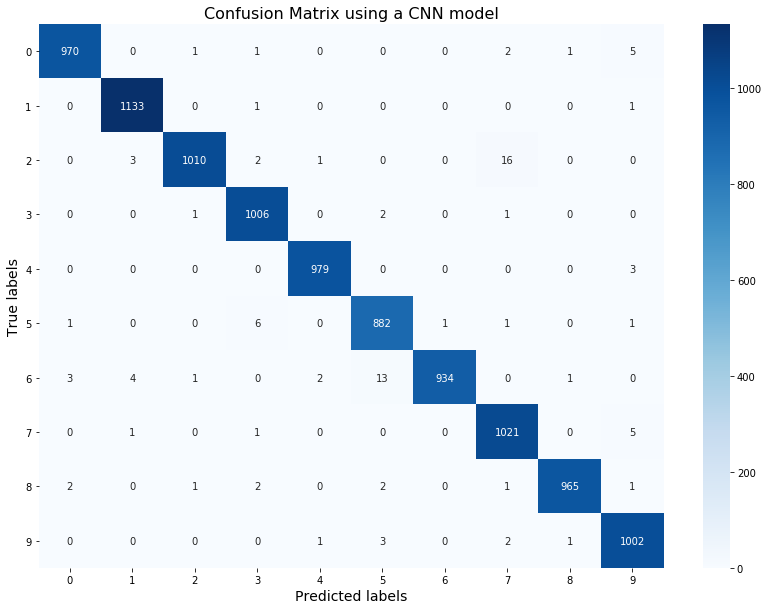

In [48]:
# Make a heatmap plot of the confusion matrix

fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap(confusion_matrix(y_test, pred2), 
            annot = True, 
            fmt = 'g',
            cmap = "Blues",
            ax = ax) # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)
ax.set_title('Confusion Matrix using a CNN model', fontsize = 16) 
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.yticks(rotation=0) 
plt.show()

In [49]:
print(classification_report(y_test, pred2, target_names = class_names))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      1.00      1.00       982
           5       0.98      0.99      0.98       892
           6       1.00      0.97      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



We can graph this to look at the full set of 10 class predictions.

In [50]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array.

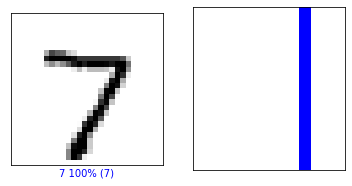

In [51]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions2, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions2,  y_test)
plt.show()

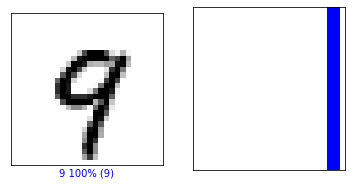

In [52]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions2, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions2,  y_test)
plt.show()

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label. Note that the model can be wrong even when very confident.

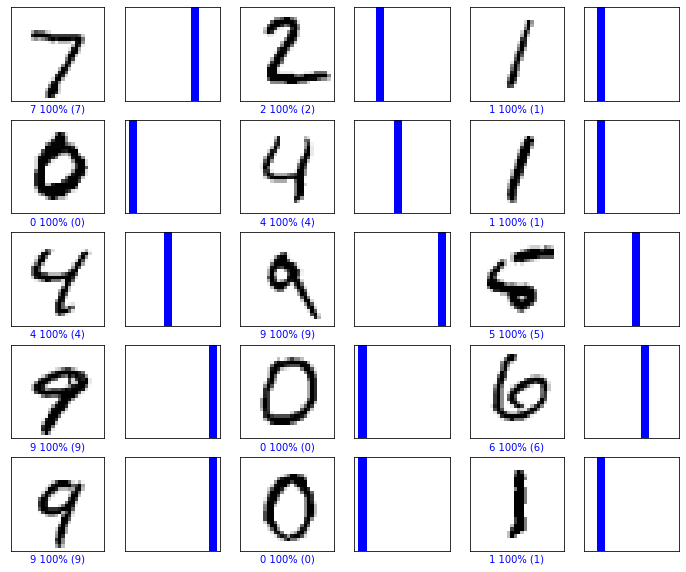

In [53]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions2, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions2, y_test)
plt.show()

In [54]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28, 1)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though we're using a single image, we need to add it to a list:

In [55]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)


Now predict the correct label for this image:

In [56]:
predictions_single = model2.predict(img)

print(predictions_single)

[[3.2178028e-12 1.3143932e-10 2.3133948e-08 5.8813331e-08 1.1976363e-10
  5.4326094e-10 9.8390737e-15 9.9999988e-01 1.4988726e-10 2.2449280e-08]]


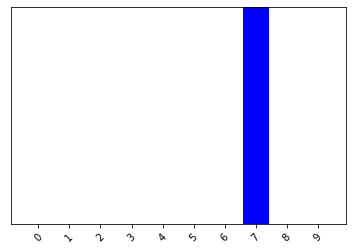

In [57]:
plot_value_array(0, predictions_single, y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [58]:
# And, as before, the model predicts a label of 9.
np.argmax(predictions_single[0])

7

## YOUR TURN:

- Using the MNIST data, test different [Sequential](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/Sequential) Keras models - `modelX = tf.keras.models.Sequential()` <br>and evaluate classification performances as above.

- To train a model with fit, you need to specify a [loss function](https://en.wikipedia.org/wiki/Loss_function), an [optimizer](https://en.wikipedia.org/wiki/Mathematical_optimization), and optionally, some [metrics](https://en.wikipedia.org/wiki/Precision_and_recall) to monitor. You pass these to the model as arguments to the `compile()` method. 
Test different [optimizers](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/optimizers), 
[loss](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses) functions, and
[metrics](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/metrics), i.e.<br> 
 > modelX.compile(optimizer='xxx', loss='yyy', metrics=['zzz'])

### To probe further (medical imaging):

[An overview of deep learning in medical imaging focusing on MRI](https://www.sciencedirect.com/science/article/pii/S0939388918301181). Zeitschrift für Medizinische Physik
Volume 29, Issue 2, May 2019, Pages 102-127.